  # ASSIGNMENT- 2


# Importing Libraries


In [1]:
import os
import numpy as np
import pandas as pd

Current Working Directory

In [2]:
os.getcwd()

'C:\\Users\\Jone Abutelin B\\Desktop\\Python'

# Loading the dataset

In [3]:
data=pd.read_csv('Churn_Modelling.csv')

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3.Visualizations

# *Univariate Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

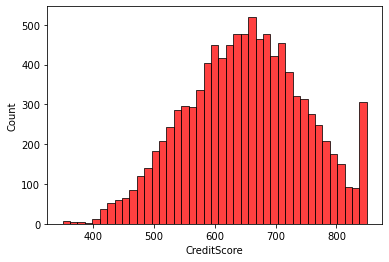

In [10]:
sns.histplot(data["CreditScore"],color='red')

# *Bivariate Analysis

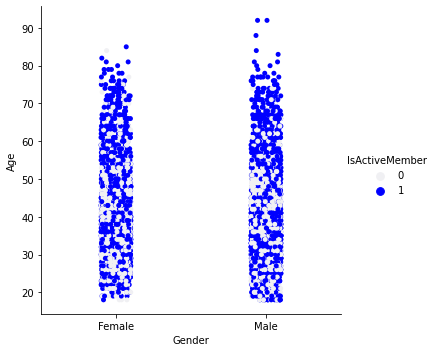

In [12]:
sns.catplot(x='Gender', y='Age', hue='IsActiveMember', data=data,color='blue')

# *Multi-Variate Analysis

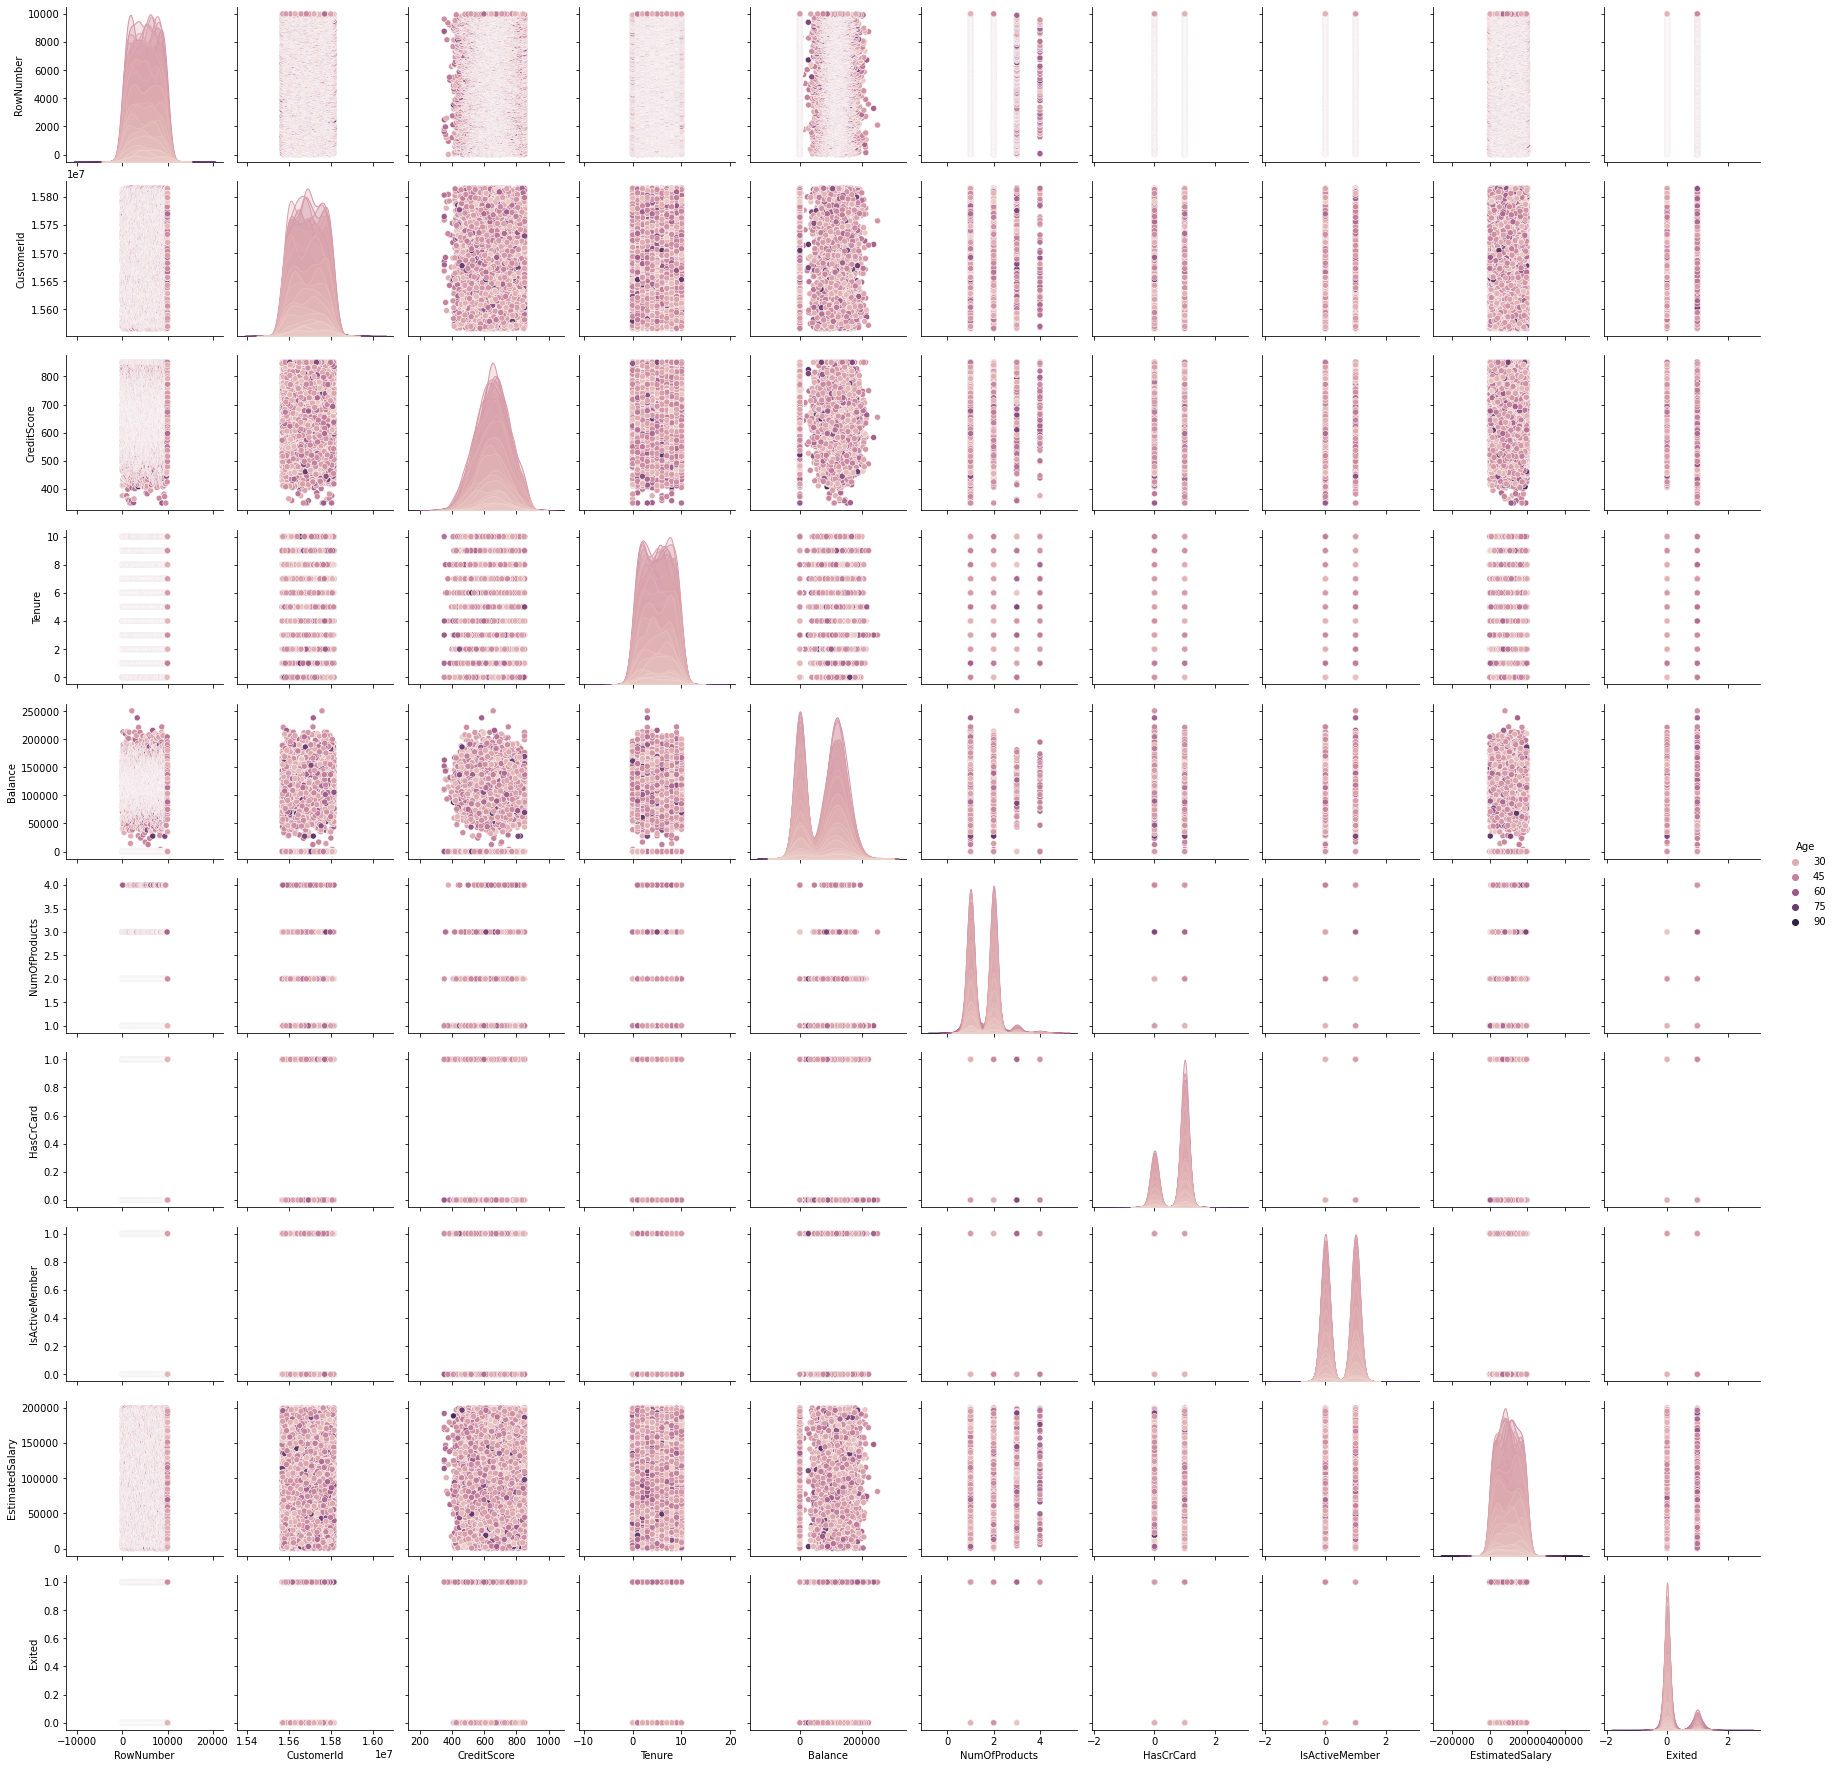

In [13]:
sns.pairplot(data,hue="Age")

# 4.Perform descriptive statistics on the dataset.


In [14]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5.Handle the Missing values.

In [15]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6.Find the outliers and replace the outliers

In [16]:
CreditsMedian = data.loc[data['CreditScore']<400, 'CreditScore'].median()
ProdMedian = data.loc[data['NumOfProducts']>=3.5,'NumOfProducts'].median()

data.loc[data.CreditScore < 400, 'CreditScore'] = np.nan
data.fillna(CreditsMedian,inplace=True)
data.loc[data.NumOfProducts > 3, 'NumOfProducts'] = np.nan
data.fillna(ProdMedian,inplace=True)

# 7. Check for Categorical columns and perform encoding.

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Surname'] = le.fit_transform(data['Surname'])
data['Gender']  = le.fit_transform(data['Gender'])

data.head(10)



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,France,0,42,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,1177,608.0,Spain,0,41,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,2040,502.0,France,0,42,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,289,699.0,France,0,39,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,1822,850.0,Spain,0,43,2,125510.82,1.0,1,1,79084.10,0
5,6,15574012,537,645.0,Spain,1,44,8,113755.78,2.0,1,0,149756.71,1
6,7,15592531,177,822.0,France,1,50,7,0.00,2.0,1,1,10062.80,0
7,8,15656148,2000,365.0,Germany,0,29,4,115046.74,4.0,1,0,119346.88,1
8,9,15792365,1146,501.0,France,1,44,4,142051.07,2.0,0,1,74940.50,0
9,10,15592389,1081,684.0,France,1,27,2,134603.88,1.0,1,1,71725.73,0


# 8.Split the data into dependent and independent variables

In [19]:
independent = data.iloc[:, 0:1]
dependent = data.iloc[:,1:]

# 9.Scale the independent variables

In [20]:
nm =MinMaxScaler()
N_independent = nm.fit_transform(independent)

# 10. Split the data into training and testing

In [23]:
x=data.drop(columns = ['CreditScore'],axis = 1)
y = data['CreditScore']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [24]:
x_train

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7681,7682,15633608,259,France,1,33,2,146193.60,2.0,1,1,55796.83,1
9031,9032,15742323,164,France,1,39,7,0.00,2.0,1,0,19823.02,0
3691,3692,15760244,1304,France,0,76,5,160979.68,1.0,0,1,13848.58,0
202,203,15600974,1146,Spain,1,50,5,0.00,1.0,0,1,146145.93,1
5625,5626,15663234,257,France,0,60,7,143262.04,1.0,1,1,129562.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,9226,15584928,2680,Germany,0,32,4,120074.97,2.0,1,1,162961.79,0
4859,4860,15647111,2803,Spain,0,22,4,114440.24,1.0,1,1,107753.07,0
3264,3265,15574372,1202,France,1,35,5,161274.05,2.0,1,0,181429.87,0
9845,9846,15664035,2122,Spain,0,38,9,0.00,2.0,1,1,148750.16,0


In [25]:
x_test

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,9395,15615753,2691,Germany,0,35,8,131101.04,1.0,1,1,192852.67,0
898,899,15654700,846,France,0,40,2,102967.41,1.0,1,0,128702.10,1
2398,2399,15633877,1857,Spain,0,42,8,95386.82,1.0,1,1,75732.25,0
5906,5907,15745623,2854,France,1,32,4,112079.58,1.0,0,0,89368.59,0
2343,2344,15765902,997,Germany,1,38,5,163034.82,2.0,1,1,135662.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4005,15738546,978,Spain,0,41,4,0.00,2.0,0,1,147606.71,0
7375,7376,15638871,436,France,1,77,6,80926.02,2.0,1,1,55829.25,0
9307,9308,15680405,2089,France,1,40,2,168001.34,2.0,1,1,167400.29,0
8394,8395,15597983,336,France,1,69,10,154953.94,1.0,1,1,70849.47,0
